# Data Description

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [70]:
#Importing Required Libraries for EDA and metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [71]:
#Reading the data frame
df = pd.read_csv("mushrooms.csv")


In [72]:
#Fisrt 5 records
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [73]:
#info for my dataframe which tells about Dtype and null data if available i see there are no issing values which can be treated.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

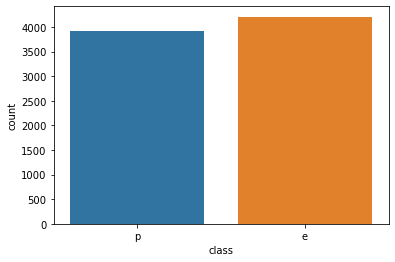

In [74]:
# Couting my class to see imbalance data in this case i dont feel there is any imbalance data
sns.countplot(df['class'])

In [75]:
#Value count of class
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [76]:
#Changing my class from p and e to 0  and 1 using LabelEncoder
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['class']= label_encoder.fit_transform(df['class'])
  
df['class'].unique()

array([1, 0])

In [77]:
#Correlation for continous variables
corr = df.corr()

In [78]:
corr

,class
class,1.0


In [79]:
#Seperating my features and label as X and y
X = df.drop('class', axis=1)
y = df['class']

In [80]:
#Encoding my features using OneHotEncoder i even tried using get_dummies but i dont see good out put from my model so when i used onehot encoder i see some improvement in my model
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_encode = ohe.fit_transform(X)

In [81]:
X_encode

<8124x117 sparse matrix of type '<class 'numpy.float64'>'
	with 178728 stored elements in Compressed Sparse Row format>

In [82]:
# Splitting my data into test and train 
x_train,x_test,y_train,y_test = train_test_split(X_encode,y,test_size=0.30,random_state=11)

In [83]:
#Building my logsitic regression model
from sklearn.linear_model import LogisticRegression
logic_r = LogisticRegression(solver='liblinear') #Instantiate the LogisticRegression object
logic_r.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = logic_r.predict(x_test) #Predict  

In [84]:
#Metrics for my model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[1274    0]
 [   2 1162]]
----------------------------------------
Accuracy of Logistic Regression :1.00
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [85]:
#Building SVC for my Model
from sklearn.svm import SVC
svc = SVC() #Instantiate the LogisticRegression object
svc.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = svc.predict(x_test) #Predict  

In [86]:
#Metrics for my SVC model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
SVC_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Support Vector classifier :{:.2f}'.format(SVC_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[1274    0]
 [   0 1164]]
----------------------------------------
Accuracy of Support Vector classifier :1.00
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [87]:
#Builiding Desicion Tree Model
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier() #Instantiate the LogisticRegression object
DT.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = DT.predict(x_test) #Predict  

In [88]:
#Metrics for my model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
DT_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Decision Tree CLassifier :{:.2f}'.format(DT_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[1274    0]
 [   2 1162]]
----------------------------------------
Accuracy of Decision Tree CLassifier :1.00
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [89]:
#Building Random Forest Model
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier() #Instantiate the LogisticRegression object
randf.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = randf.predict(x_test) #Predict  

In [90]:
#Metrics for my model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
randf_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of  Random Forest :{:.2f}'.format(randf_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[1274    0]
 [   0 1164]]
----------------------------------------
Accuracy of  Random Forest :1.00
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [91]:
#for corss Validation
from sklearn.model_selection import KFold,cross_val_score


In [92]:
#Cross Validation  for Linear regression
a =cross_val_score(logic_r,X_encode,y,cv=5).mean()
b = LR_accuracy

b-a

0.07946718861178992

In [93]:
#Cross Validation  for RandomForest
a = cross_val_score(randf,X_encode,y,cv=5).mean()
b = randf_accuracy
b-a

0.06808404698749526

In [94]:
#Cross Validation  for Support Vector Classifier
a = cross_val_score(svc,X_encode,y,cv=5).mean()
b = SVC_accuracy
b-a

0.12424115195149665

In [95]:
#Cross Validation  for Desicion tree
a = cross_val_score(DT,X_encode,y,cv=5).mean()
b = DT_accuracy
b-a

0.06100186083611725

So Here I see that my algorithms are slightly over fitted i have used cross validation to confirm the same based on this process came to conclution that desicion tree algorithm has less  variance for my accuracy  with cross_val_score. Hence finalising Desicion tree  algorith as a final algorithm.

# Creating PKL file

In [97]:
#Saving the model in pkl file
import joblib
joblib.dump(DT,"Mushroom_Prediction.pkl")

model = joblib.load("Mushroom_Prediction.pkl")

#Predicting the saved model
prediction = model.predict(x_test)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("Results_Mushroom.csv",index=False)

